<a href="https://colab.research.google.com/github/will-cotton4/AB-Demo/blob/master/polynomial_log_linear_regression_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## Your model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

In [9]:
import pandas as pd

ames_url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'

ames_train = pd.read_csv(ames_url)

ames_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [11]:
ames_train.isna().sum().sort_values(ascending=False).head(10)

LotFrontage     259
GarageFinish     81
GarageType       81
GarageCond       81
GarageQual       81
GarageYrBlt      81
BsmtExposure     38
BsmtFinType2     38
BsmtFinType1     37
BsmtCond         37
dtype: int64

In [13]:
#Drop sparse columns
ames_train = ames_train.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 
                                      'Fence', 'FireplaceQu', 'Id'])

KeyError: ignored

In [15]:
ames_train.columns[:-1]

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [17]:
ames_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object


In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer



features = ames_train.select_dtypes(
    include=['float64', 'int64']).drop(
    columns=['Id']).columns
target = 'SalePrice'
x = SimpleImputer().fit_transform(ames_train.loc[:, features])

y = ames_train.loc[:, target].values

x = StandardScaler().fit_transform(x)

In [73]:
ames_train.shape

(1460, 76)

In [86]:
len(features)

37

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 30)

principalComponents = pca.fit_transform(x)

In [0]:
scaled_var_exp = pca.explained_variance_/sum(pca.explained_variance_)

In [52]:
scaled_var_exp

array([0.21775052, 0.0883417 , 0.07095591, 0.05581141, 0.041063  ,
       0.03288758, 0.03173451, 0.03122263, 0.03056314, 0.03016591,
       0.02894079, 0.02815355, 0.02786246, 0.02632947, 0.02529659,
       0.02477026, 0.02327492, 0.02238681, 0.02163715, 0.02035587,
       0.01856662, 0.01720033, 0.01617102, 0.01488716, 0.01184411,
       0.01105982, 0.00887903, 0.00801877, 0.00725712, 0.00661187])

In [0]:
labels = ['pc' + str(num) for num in range(1,31)]

<BarContainer object of 30 artists>

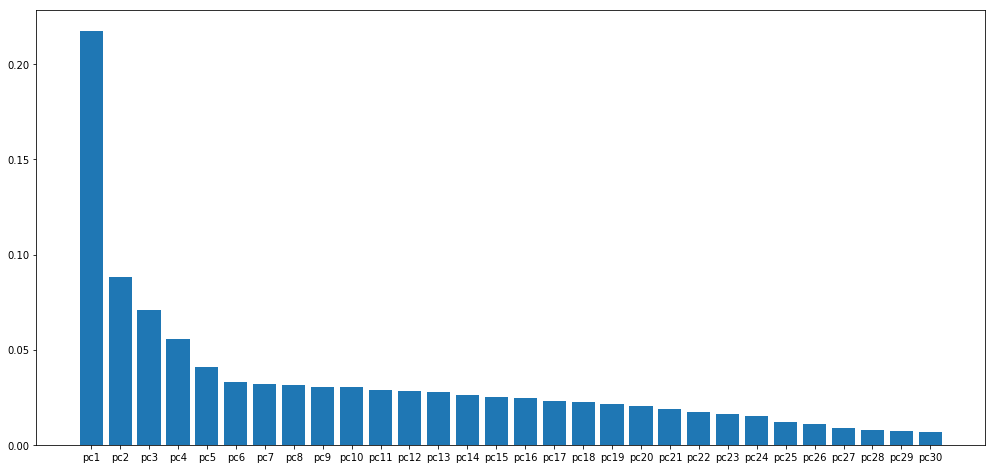

In [58]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize = (17,8))
fig.add_axes()
ax1=fig.add_subplot(111)
ax1.bar(x=labels, height=scaled_var_exp)

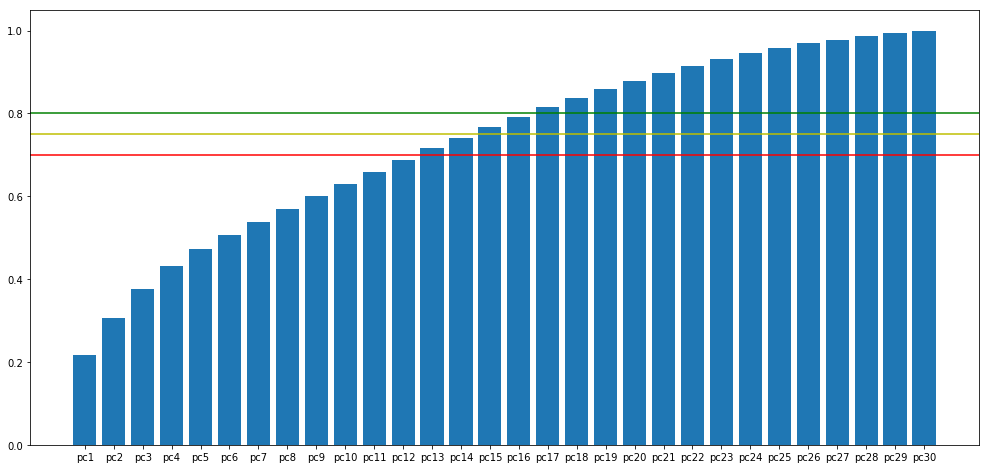

In [60]:
j=0
cum_varex=np.zeros(30)
while j < len(scaled_var_exp):
  cum_varex[j] = sum(scaled_var_exp[:j+1])
  j+=1
  
fig = plt.figure(figsize = (17,8))
fig.add_axes()
ax2=fig.add_subplot(111)
ax2.bar(x=labels, height=cum_varex)#, cmap = 'Greens')
ax2.axhline(0.7, color='r')
ax2.axhline(0.75, color='y')
ax2.axhline(0.8, color='g')

In [0]:
principalComponentsDF = pd.DataFrame(data = principalComponents, columns = labels)

In [0]:
top_PCA_labels = principalComponentsDF.columns[:13]
top_PCA = principalComponentsDF[top_PCA_labels]

In [0]:
ames_train[top_PCA_labels] = top_PCA

In [85]:
ames_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [0]:
# Create interaction terms:
from sklearn.preprocessing import PolynomialFeatures
X = ames_train[['LotArea', 'YearBuilt']]
interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_inter = interaction.fit_transform(X)
ames_train['layb_int'] = (X_inter.T[2])

In [0]:
ames_train['log_area'] = ames_train['LotArea'].apply(np.log)

In [122]:
# Finally: make the model with the good stuff:
features = ['LotArea', 'log_area', 'layb_int', 'YearBuilt', 'YrSold']
features += (list(top_PCA_labels))
# features = (list(top_PCA_labels))
X = ames_train[features]
y = ames_train['SalePrice']
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

model = regr.fit(X,y)
y_pred = model.predict(X)

print("R^2 score:", model.score(X,y))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))

R^2 score: 0.837491644821974
RMSE: 32014.150612825317


In [120]:
print("R^2 score:", model.score(X,y))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))

R^2 score: 0.8346831899880482
RMSE: 32289.59848542152


In [118]:
#Baseline for comparison:
mean_vec = [y.mean() for i in range(len(y_pred))]
print("RMSE:", np.sqrt(mean_squared_error(y, mean_vec)))

RMSE: 79415.29188606751


In [0]:
#Not great... maybe we can make it better with categorical encoding:

def good_road(string):
  if string == 'Pave':
    return 0
  else:
    return 1
ames_train['good_road'] = ames_train['Street'].apply(good_road)

def util(string):
  if string == 'AllPub':
    return 4
  elif string == 'NoSewr':
    return 3
  elif string == 'NoSeWa':
    return 2
  elif string == 'ELO':
    return 1
  
ames_train['util'] = ames_train['Utilities'].apply(util)

In [0]:
nbhd_median = ames_train.groupby('Neighborhood')['SalePrice'].agg(np.median).to_dict()
ames_train['nbhd_median'] = ames_train['Neighborhood'].apply(lambda x: nbhd_median[x])

In [143]:
features = ['LotArea', 'log_area', 'layb_int', 'YearBuilt', 
            'YrSold', 'util', 'good_road', 'nbhd_median',]
features += (list(top_PCA_labels))
# features = (list(top_PCA_labels))
X = ames_train[features]
y = ames_train['SalePrice']
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

regr = LinearRegression()

model = regr.fit(X,y)
y_pred = model.predict(X)

print("R^2 score:", model.score(X,y))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))

R^2 score: 0.8563828905828044
RMSE: 30095.892515976837


# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data